If you plot the runtime of the linkage method with the number of points, you can see that the runtime increases with the increase in number of data points. In addition to it, you would notice that the increase in run time is not linear with respect to the increase in data points, but quadratic. This makes the technique of hierarchical clustering infeasible for huge number of data points

### Use of timelit method
How long does it take to execute?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
import pandas as pd
import random, timeit
points=100

In [ ]:
df = pd.DataFrame({'x': random.sample(range(0, points), points),
                  'y': random.sample(range(0, points), points)})

%timeit linkage(df[['x', 'y']], method='ward', metric='euclidean')

574 µs ± 119 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### FIFA 18: exploring defenders

In [ ]:
df = pd.read_csv("/content/fifa_18_sample_data.csv")
df.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


**In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:**

- **sliding tackle**: a number between 0-99 which signifies how accurate a player is able to perform sliding tackles
-**aggression**: a number between 0-99 which signifies the commitment and will of a player.<br/>
These are typically high in defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.


In [ ]:
fifa = df[['sliding_tackle', 'aggression']]
fifa.head()

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29


In [ ]:
# normalize data for clustering
from scipy.cluster.vq import whiten

# Use the whiten() function to standardize the data
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

fifa.head()

<ipython-input-13-22837c46233b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
<ipython-input-13-22837c46233b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa['scaled_aggression'] = whiten(fifa['aggression'])


,sliding_tackle,aggression,scale_sliding_tackle,scale_aggression,scaled_sliding_tackle,scaled_aggression
0,23,63,0.873776,3.505773,0.873776,3.505773
1,26,48,0.987747,2.671065,0.987747,2.671065
2,33,56,1.253679,3.116243,1.253679,3.116243
3,38,78,1.443630,4.340481,1.443630,4.340481
4,11,29,0.417893,1.613769,0.417893,1.613769


<ipython-input-17-296a7b4a8ab1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')


                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            2.837810           4.280968
2                            0.579966           1.766698
3                            1.166930           3.415214


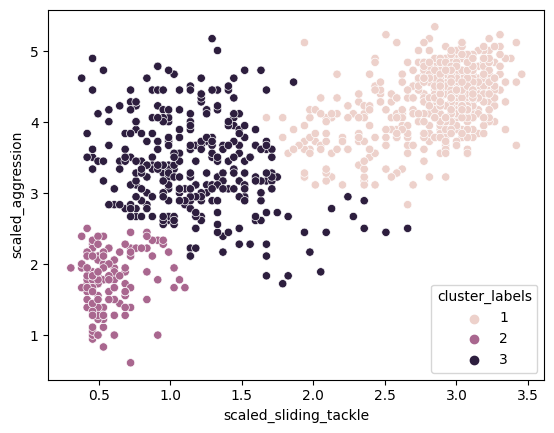

In [ ]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()